About Dataset
Context

Water is essential for all the crops and livestocks as much as it is important for human beings. Crops and livestocks consume direct ground water, and if the quality is not up to the mark, or becomes unusable, then crops and livestocks are affected, which may lead to crop failure or livestocks developing diseases.
By knowing the quality of the ground water, whether usable or not, the water can be put to appropriate use. Farmers can grow specific crops which can tolerate that quality of water.

Usage

By using these datasets one can train an ML Classification model to classify the water quality into one of the multiple classes and know where and how the water can be used.

Data collected

This data is collected from Telangana Open Data portal, Telangana State, India.
This data contains samples tested from various districts.

There are 3 files, each or year 2018, 2019 and 2020 contains post-monsoon season groundwater quality details.
ground_water_quality_2018_post.csv,
ground_water_quality_2019_post.csv,
ground_water_quality_2020_post.csv can be combinedly used.

Each dataset contains 26 columns such as:
serial num (sno), District, Mandal, Village, Lattitude, Longitude, Chemicals (such as Ca, Mg, CO3 etc), Total Hardness of the water, Total dissolved solids, RSC, SAR, and the target variables 'Classification' and 'Classification1'.
The feature columns can be used to predict water quality which are broadly classified into 9 classes, which are: C3S1, C2S1, C4S1,C4S2 , C3S2 ,C4S4 ,C3S3 ,C4S3, C1S1.

C1S1: Low salinity and low sodium waters are good for irrigation and can be used with
most crops with no restriction on use on most of the soils.

C2S1: Medium salinity and low sodium waters are good for irrigation and can be used on
all most all soils with little danger of development of harmful levels of exchangeable
sodium if a moderate amount of leaching occurs. Crops can be grown without any special
consideration for salinity control.

C3S1: The high salinity and low sodium waters require good drainage. Crops with good
salt tolerance should be selected.

C3S2: The high salinity and medium sodium waters require good drainage and can be used
on coarse - textured or organic soils having good permeability.

C3S3: These high salinity and high sodium waters require special soil management, good
drainage, high leaching and organic matter additions. Gypsum amendments make feasible
the use of these waters.

C4S1: Very high salinity and low sodium waters are not suitable for irrigation unless the
soil must be permeable and drainage must be adequate. Irrigation waters must be applied
in excess to provide considerable leaching. Salt tolerant crops must be selected.

C4S2: Very high salinity and medium sodium waters are not suitable for irrigation on fine
textured soils and low leaching conditions and can be used for irrigation on coarse textured
or organic soils having good permeability.

C4S3: Very high salinity and high sodium waters produce harmful levels of exchangeable
sodium in most soils and will require special soil management, good drainage, high
leaching, and organic matter additions. The Gypsum amendment makes feasible the use of
these waters.

C4S4: Very high salinity and very high sodium waters are generally unsuitable for
irrigation purposes. These are sodium chloride types of water and can cause sodium
hazards. It can be used on coarse-textured soils with very good drainage for very high salt tolerant crops. Gypsum amendments make feasible the use of these waters.

Classification of groundwater based on RSC

RSC is defined as the excess of carbonate and bicarbonate amount over the alkaline
earths (Ca2+ and Mg2+). Use of RSC beyond permissible limit (>2.5) adversely affects irrigation.
The tendency of Ca2+ and Mg2+ to precipitate, as the water in the soil becomes more
concentrated, as a result of evaporation and plant transpiration, and gets fixed in the soil by the
process of base exchange, thereby decreasing the soil permeability.
RSC = ((CO3 2-) + (HCO3-)) - ((Ca2+)+(Mg2+))
Where concentrations are in meq/L.

RSC less than 1.25 is safe
RSC between 1.25 and 2.50 is marginal
RSC greater than 2.50 is unsuitable

Use of ground water for livestock and poultry

TDS < 1000 mg/L -- Excellent -- Excellent for all classes of livestock and poultry.

TDS b/w 1000-3000 -- very satisfactory -- Satisfactory for all classes of livestock. May cause temporary mild diarrhea in livestock not accustomed to them. Those waters approaching the upper limits may cause some watery droppings in poultry.

TDS b/w 3000-5000 -- Satisfactory for livestock Unfit for poultry -- Satisfactory for livestock but may be refused by animals not accustomed to it. If Sulphate salts predominate, animals may show temporary diarrhea. Poor waters for poultry, often causing watery faeces, increased mortality and decreasedgrowth especially in turkeys.

TDS b/w 5000-7000 -- Limited use for livestock Unfit for poultry -- This water can be used for livestock except for those that are pregnant or lactating. It may have some laxative effect and may be refused by animals until they become accustomed to it. It is unsatisfactory for poultry.

TDS b/w 7000-10,000 -- Very limited use -- Considerable risk for pregnant and lactating cows, horses, sheep and for the young of these species. It may be used for older ruminants or horses. Unfit for poultry and probably swine.

TDS > 10,000 -- Not recommended -- This water is unsatisfactory for all classes of livestock and poultry.

In [ ]:
### Impoting librareis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
df_2018 = pd.read_csv("/content/ground_water_quality_2018_post.csv")
df_2019 = pd.read_csv("/content/ground_water_quality_2019_post.csv")
df_2020 = pd.read_csv("/content/ground_water_quality_2020_post.csv")

In [ ]:
df_2018.head().T

,0,1,2,3,4
sno,1,2,3,4,5
district,ADILABAD,ADILABAD,ADILABAD,ADILABAD,ADILABAD
mandal,Adilabad,Bazarhatnur,Gudihatnoor,Jainath,Narnoor
village,Adilabad,Bazarhatnur,Gudihatnoor,Jainath,Narnoor
lat_gis,19.6683,19.458888,19.525555,19.730555,19.495665
long_gis,78.5247,78.350833,78.512222,78.64,78.852654
gwl,5.09,5.1,4.98,5.75,2.15
season,postmonsoon 2018,postmonsoon 2018,postmonsoon 2018,postmonsoon 2018,postmonsoon 2018
pH,8.28,8.29,7.69,8.09,8.21
E.C,745,921,510,422,2321


In [ ]:
df_2020.drop(["Unnamed: 8"], axis = 1, inplace = True)

In [ ]:
print(df_2018.shape)
print(df_2019.shape)
print(df_2020.shape)

(374, 26)
(364, 26)
(368, 26)


In [ ]:
print(df_2018.columns)
print(df_2019.columns)
print(df_2020.columns)

Index(['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl',
       'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4',
       'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification', 'RSC  meq  / L',
       'Classification.1'],
      dtype='object')
Index(['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl',
       'season', 'pH', 'EC', 'TDS', 'CO_-2 ', 'HCO_ - ', 'Cl -', 'F -',
       'NO3- ', 'SO4-2', 'Na+', 'K+', 'Ca+2', 'Mg+2', 'T.H', 'SAR',
       'Classification', 'RSC  meq  / L', 'Classification.1'],
      dtype='object')
Index(['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl',
       'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4',
       'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification', 'RSC  meq  / L',
       'Classification.1'],
      dtype='object')


In [ ]:
column_name_mapping = {
    'EC': 'E.C',
    'CO_-2 ': 'CO3',
    'HCO_ - ': 'HCO3',
    'Cl -': 'Cl',
    'F -': 'F',
    'NO3- ': 'NO3 ',
    'SO4-2': 'SO4',
    'Na+': 'Na',
    'K+': 'K',
    'Ca+2': 'Ca',
    'Mg+2': 'Mg'
}

In [ ]:
df_2019 = df_2019.rename(columns = column_name_mapping)

In [ ]:
df_2020 = df_2020.rename(columns = column_name_mapping)

In [ ]:
df = pd.concat([df_2018,df_2019,df_2020])

In [ ]:
df = df.drop(['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis','season','RSC  meq  / L','Classification.1'], axis = 1)

In [ ]:
df.head()

,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,Classification
0,5.09,8.28,745,476.80,0.0,220.0,60,0.44,42.276818,46.0,49.0,4.0,48.0,38.896,279.934211,1.273328,C2S1
1,5.10,8.29,921,589.44,0.0,230.0,80,0.56,100.659091,68.0,42.0,5.0,56.0,63.206,399.893092,0.913166,C3S1
2,4.98,7.69,510,326.40,0.0,200.0,30,0.66,41.471545,44.0,45.0,2.0,24.0,38.896,219.934211,1.319284,C2S1
3,5.75,8.09,422,270.08,0.0,160.0,10,0.58,10.669864,35.0,27.0,1.0,32.0,19.448,159.967105,0.928155,C2S1
4,2.15,8.21,2321,1485.44,0.0,300.0,340,2.56,128.843636,280.0,298.0,5.0,56.0,92.378,519.843750,5.682664,C4S2


In [ ]:
df.shape

(1106, 17)

In [ ]:
df.head()

,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,Classification
0,5.09,8.28,745,476.80,0.0,220.0,60,0.44,42.276818,46.0,49.0,4.0,48.0,38.896,279.934211,1.273328,C2S1
1,5.10,8.29,921,589.44,0.0,230.0,80,0.56,100.659091,68.0,42.0,5.0,56.0,63.206,399.893092,0.913166,C3S1
2,4.98,7.69,510,326.40,0.0,200.0,30,0.66,41.471545,44.0,45.0,2.0,24.0,38.896,219.934211,1.319284,C2S1
3,5.75,8.09,422,270.08,0.0,160.0,10,0.58,10.669864,35.0,27.0,1.0,32.0,19.448,159.967105,0.928155,C2S1
4,2.15,8.21,2321,1485.44,0.0,300.0,340,2.56,128.843636,280.0,298.0,5.0,56.0,92.378,519.843750,5.682664,C4S2


In [ ]:
df.isnull().sum()

gwl                11
pH                  0
E.C                 0
TDS                 0
CO3               160
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
dtype: int64

In [ ]:
df.head()

,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,Classification
0,5.09,8.28,745,476.80,0.0,220.0,60,0.44,42.276818,46.0,49.0,4.0,48.0,38.896,279.934211,1.273328,C2S1
1,5.10,8.29,921,589.44,0.0,230.0,80,0.56,100.659091,68.0,42.0,5.0,56.0,63.206,399.893092,0.913166,C3S1
2,4.98,7.69,510,326.40,0.0,200.0,30,0.66,41.471545,44.0,45.0,2.0,24.0,38.896,219.934211,1.319284,C2S1
3,5.75,8.09,422,270.08,0.0,160.0,10,0.58,10.669864,35.0,27.0,1.0,32.0,19.448,159.967105,0.928155,C2S1
4,2.15,8.21,2321,1485.44,0.0,300.0,340,2.56,128.843636,280.0,298.0,5.0,56.0,92.378,519.843750,5.682664,C4S2


In [ ]:
df["CO3"] = df["CO3"].fillna(df["CO3"].median())
df["gwl"] = df["gwl"].fillna(df["gwl"].median())

In [ ]:
df.describe()

,gwl,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR
count,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000
mean,8.563951,1362.238698,871.832767,5.835474,300.751525,194.258590,1.117159,75.074090,40.261935,123.759751,7.830750,83.756239,51.056145,419.199816,2.768381
std,7.492422,861.061139,551.079129,16.101937,135.121572,200.599198,0.783118,97.455247,54.090301,113.840229,20.718524,64.664074,39.213503,263.939509,2.824086
min,0.170000,205.000000,131.200000,0.000000,30.000000,10.000000,0.040000,0.097438,1.000000,5.076154,0.070000,1.200000,4.862000,39.991776,0.181178
25%,3.070000,782.000000,500.480000,0.000000,200.000000,60.000000,0.620000,17.727073,14.000000,55.937500,2.000000,40.000000,24.310000,239.967105,1.352879
50%,5.930000,1179.500000,754.880000,0.000000,290.000000,130.000000,0.930000,41.763457,23.000000,94.000000,3.110000,64.000000,43.758000,359.930099,2.073154
75%,12.295000,1673.500000,1071.040000,0.000000,380.000000,260.000000,1.420000,96.076082,41.250000,152.000000,6.000000,104.000000,68.068000,519.909540,3.189044
max,43.170000,9499.000000,6079.360000,100.000000,1070.000000,2480.000000,7.700000,1028.000000,860.000000,1099.000000,354.600000,640.000000,457.028000,3479.226974,31.435063


###  Univareint Analysis

In [ ]:
df["Classification"].value_counts()

C3S1    696
C2S1    248
C4S1     87
C4S2     36
C3S2     12
C4S4      7
C3S3      6
C4S3      5
C1S1      3
OG        2
O.G       2
C3S4      1
C2S2      1
Name: Classification, dtype: int64

In [ ]:
df.dtypes

gwl               float64
pH                 object
E.C                 int64
TDS               float64
CO3               float64
HCO3              float64
Cl                  int64
F                 float64
NO3               float64
SO4               float64
Na                float64
K                 float64
Ca                float64
Mg                float64
T.H               float64
SAR               float64
Classification     object
dtype: object

In [ ]:
df = df[df["pH"]!="8..05"]

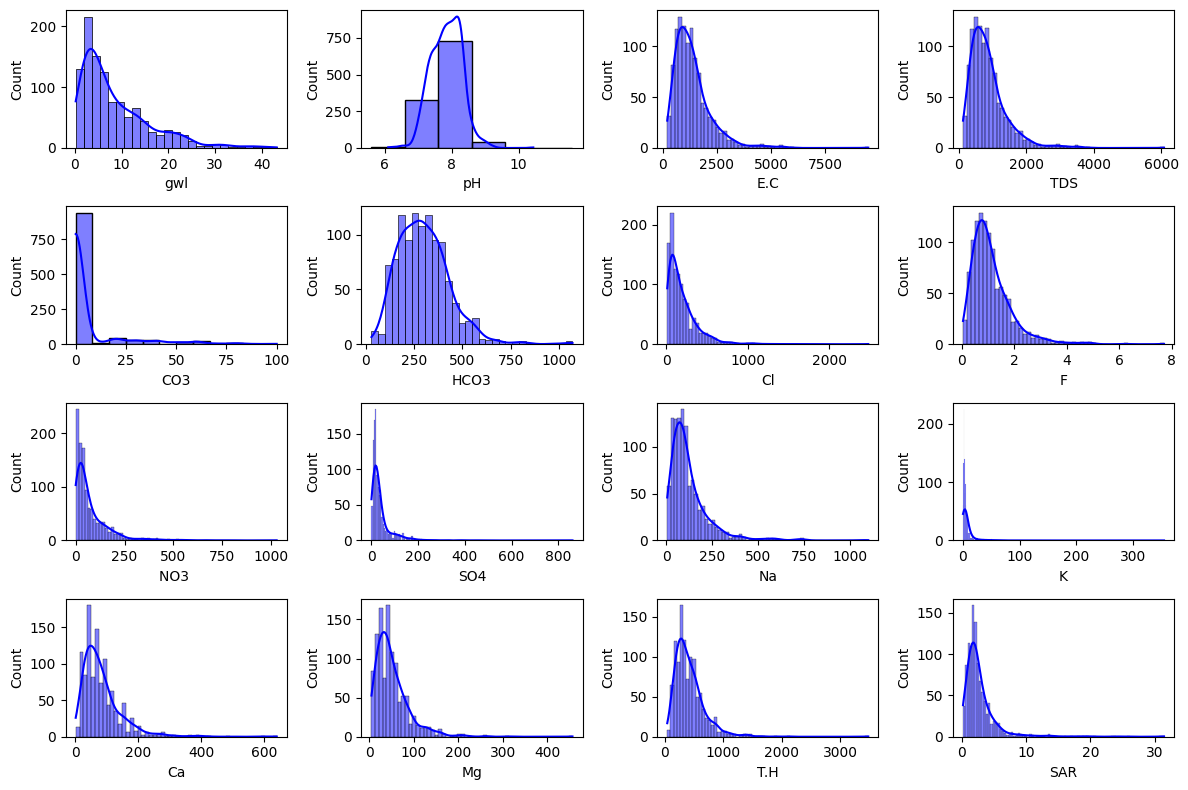

In [ ]:
fig, ax = plt.subplots(4,4,figsize = (12,8))
k = 0
for i in range(4):
  for j in range(4):
    sns.histplot(df.iloc[:,k], ax = ax[i][j] , color = "b", kde = True)
    k+=1
plt.tight_layout()

Bivareint Analysis

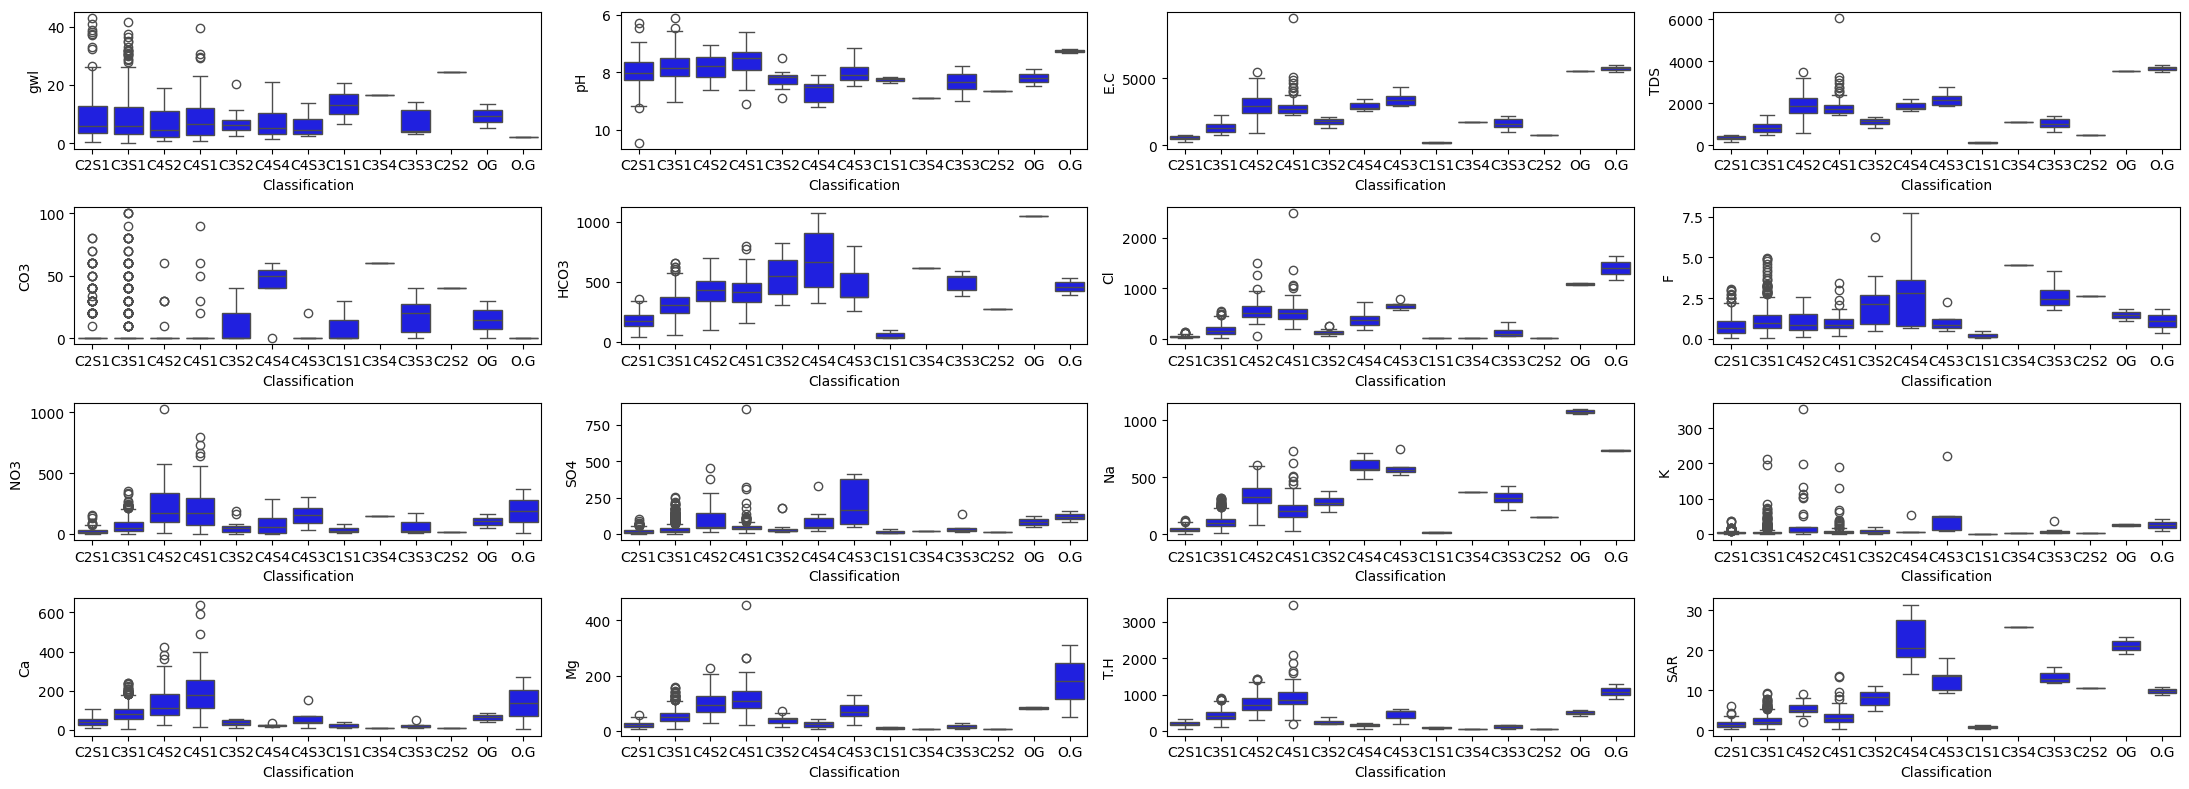

In [ ]:
fig, ax = plt.subplots(4,4,figsize = (22,8))
k = 0
for i in range(4):
  for j in range(4):
    sns.boxplot(x =df["Classification"], y = df.iloc[:,k], ax = ax[i][j] , color = "b" )
    k+=1
plt.tight_layout()

In [ ]:
df = df[~df['Classification'].isin(['C3S4', 'C2S2','OG','O.G'])]

In [ ]:
df

,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,Classification
0,5.09,8.28,745,476.80,0.0,220.0,60,0.44,42.276818,46.0,49.00,4.00,48.0,38.896,279.934211,1.273328,C2S1
1,5.10,8.29,921,589.44,0.0,230.0,80,0.56,100.659091,68.0,42.00,5.00,56.0,63.206,399.893092,0.913166,C3S1
2,4.98,7.69,510,326.40,0.0,200.0,30,0.66,41.471545,44.0,45.00,2.00,24.0,38.896,219.934211,1.319284,C2S1
3,5.75,8.09,422,270.08,0.0,160.0,10,0.58,10.669864,35.0,27.00,1.00,32.0,19.448,159.967105,0.928155,C2S1
4,2.15,8.21,2321,1485.44,0.0,300.0,340,2.56,128.843636,280.0,298.00,5.00,56.0,92.378,519.843750,5.682664,C4S2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,9.90,7.8,2324,1487.36,0.0,370.0,370,0.58,336.161100,33.0,169.30,2.60,160.0,97.240,799.835526,2.602728,C4S1
364,5.74,8.26,2109,1349.76,0.0,430.0,260,1.08,332.175000,33.0,211.30,43.30,48.0,116.688,599.802632,3.751176,C3S1
365,1.72,8.77,1115,713.60,20.0,180.0,220,0.34,44.201420,15.0,60.44,3.04,80.0,53.482,419.909539,1.282386,C3S1
366,1.65,7.76,5053,3233.92,0.0,280.0,1360,0.44,76.355960,109.0,465.20,3.30,400.0,92.378,1379.843750,5.444988,C4S1


In [ ]:
X=df.drop(['Classification'],axis=1)
y=df['Classification']

#Splitting train test by startified

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
#Label Encoding the Target feature

encoder = LabelEncoder()

# Fit and transform the training target variable 'y_train'
y_train_encoded = encoder.fit_transform(y_train)

# Transform the test target variable 'y_test'
y_test_encoded = encoder.transform(y_test)

In [ ]:
# 5 fold cross validation
models=[xgb.XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8),
        RandomForestClassifier(n_estimators=50,random_state=42)]

num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and evaluate models

def model_evaluation(model):


    fold_accuracies = []
    models = []

    for fold, (train_index, val_index) in enumerate(skf.split(X_train_normalized, y_train_encoded)):
        X_train_fold, X_val_fold = X_train_normalized[train_index], X_train_normalized[val_index]
        y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]


        model = model  # Replace with your chosen model and set the appropriate hyperparameters
        model.fit(X_train_fold, y_train_fold)

    # Add the trained model to the list for later evaluation
        models.append(model)

    # Step 6: Make predictions on the current fold's validation data
        y_pred_fold = model.predict(X_val_fold)

    # Step 7: Calculate accuracy for the current fold
        accuracy = accuracy_score(y_val_fold, y_pred_fold)
        fold_accuracies.append(accuracy)
        print(f"Fold {fold+1} - Accuracy: {accuracy:.4f}")

# Calculate and print the mean accuracy and standard deviation across all folds
    mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    print(f"\nMean Cross-Validation Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")

In [ ]:
for i in models:
    model_evaluation(i)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Fold 1 - Accuracy: 0.9286
Fold 2 - Accuracy: 0.9156
Fold 3 - Accuracy: 0.9481
Fold 4 - Accuracy: 0.9286
Fold 5 - Accuracy: 0.9412

Mean Cross-Validation Accuracy: 0.9324 ± 0.0113
Fold 1 - Accuracy: 0.9286


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Fold 2 - Accuracy: 0.9286
Fold 3 - Accuracy: 0.9545
Fold 4 - Accuracy: 0.9545
Fold 5 - Accuracy: 0.9542

Mean Cross-Validation Accuracy: 0.9441 ± 0.0127


In [ ]:
#best model = XGBoost

best_model = xgb.XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)  # Replace with the selected best model
best_model.fit(X_train_normalized, y_train_encoded)

# Step 8: Evaluate the final model on the test set

y_test_pred = best_model.predict(X_test_normalized)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"\nFinal Model - Test Accuracy: {test_accuracy:.4f}")


Final Model - Test Accuracy: 0.9545


In [ ]:
with open("GrounWaterQUalityModel.pkl", "wb") as file:
  pickle.dump(best_model, file)

In [ ]:
with open("GrounWaterQUalityLabelEncoder.pkl", "wb") as file:
  pickle.dump(encoder, file)

In [ ]:
with open("GrounWaterQUalityLabelscaler.pkl", "wb") as file:
  pickle.dump(scaler, file)

In [ ]:
encoded_classes = encoder.classes_

for i, class_label in enumerate(encoded_classes):
    print(f"Class Label: {class_label} - Encoded Value: {i}")

Class Label: C1S1 - Encoded Value: 0
Class Label: C2S1 - Encoded Value: 1
Class Label: C3S1 - Encoded Value: 2
Class Label: C3S2 - Encoded Value: 3
Class Label: C3S3 - Encoded Value: 4
Class Label: C4S1 - Encoded Value: 5
Class Label: C4S2 - Encoded Value: 6
Class Label: C4S3 - Encoded Value: 7
Class Label: C4S4 - Encoded Value: 8


In [ ]:
def prediction(data):
    with open('GrounWaterQUalityModel.pkl', 'rb') as file:
        loaded_model = pickle.load(file)

    new_data=np.array(data)
    new_data_normalised=scaler.transform(new_data.reshape(1,-1))
    predicted_class = loaded_model.predict(new_data_normalised)
    encoded_class=predicted_class
    original_class=encoder.inverse_transform(encoded_class)
    Class_Description={'C1S1':"Low salinity and low sodium waters are good for irrigation and can be used with most crops with no restriction on use on most of the soils. ",
                   'C2S1':"Medium salinity and low sodium waters are good for irrigation and can be used on all most all soils with little danger of development of harmful levels of exchangeable sodium if a moderate amount of leaching occurs. Crops can be grown without any special consideration for salinity control. ",
                   'C3S1':"The high salinity and low sodium waters require good drainage. Crops with good salt tolerance should be selected.",
                  'C3S2':"The high salinity and medium sodium waters require good drainage and can be used on coarse - textured or organic soils having good permeability. ",
                  'C3S3':"These high salinity and high sodium waters require special soil management, good drainage, high leaching and organic matter additions. Gypsum amendments make feasible the use of these waters. ",
                  'C4S1':"Very high salinity and low sodium waters are not suitable for irrigation unless the soil must be permeable and drainage must be adequate. Irrigation waters must be applied in excess to provide considerable leaching. Salt tolerant crops must be selected. ",
                  'C4S2':"Very high salinity and medium sodium waters are not suitable for irrigation on fine textured soils and low leaching conditions and can be used for irrigation on coarse textured or organic soils having good permeability. ",
                  'C4S3':"Very high salinity and high sodium waters produce harmful levels of exchangeable sodium in most soils and will require special soil management, good drainage, high leaching, and organic matter additions. The Gypsum amendment makes feasible the use of these waters. ",
                  'C4S4':"Very high salinity and very high sodium waters are generally unsuitable for irrigation purposes. These are sodium chloride types of water and can cause sodium hazards. It can be used on coarse-textured soils with very good drainage for very high salt tolerant crops. Gypsum amendments make feasible the use of these waters. "
                  }

    if original_class[0] in Class_Description:
        print(original_class[0]+" "+Class_Description[original_class[0]])

In [ ]:
test_data=[5.66,8.02,420,275.3,0.0,153.3,12,0.55,11.200,37,25,1.0,33.0,20.5,160.3,0.938]
prediction(test_data)

C2S1 Medium salinity and low sodium waters are good for irrigation and can be used on all most all soils with little danger of development of harmful levels of exchangeable sodium if a moderate amount of leaching occurs. Crops can be grown without any special consideration for salinity control. 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
